In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# Data collection and pre-processing

df = pd.read_csv('spam.csv')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.shape

(5572, 5)

In [7]:
#Data Cleaning

df.drop(columns = ['Unnamed: 2', 'Unnamed: 3' ,'Unnamed: 4'], inplace = True)

In [8]:
#renaming columns

df.rename(columns={'v1':'Category', 'v2':'Message'}, inplace=True)

In [9]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
# Label Encoding
#Label spam mail as 0; ham mail as 1;

df.loc[df['Category'] == 'spam' , 'Category', ] = 0
df.loc[df['Category'] == 'ham' , 'Category', ] = 1

In [9]:
import nltk

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
#It will give number of character used in each sms 
df['num_characters'] = df['Message'].apply(len)
df

,Category,Message,num_characters
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,161
5568,1,Will Ì_ b going to esplanade fr home?,37
5569,1,"Pity, * was in mood for that. So...any other s...",57
5570,1,The guy did some bitching but I acted like i'd...,125


In [12]:
#num of words
df['num_words'] = df['Message'].apply(lambda x : nltk.word_tokenize(x))
df.head()

,Category,Message,num_characters,num_words
0,1,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,1,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,1,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,1,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [13]:
# Tp calculate length of these words we will len function

df['num_words'] = df['Message'].apply(lambda x :len(nltk.word_tokenize(x)))

df.head()

,Category,Message,num_characters,num_words
0,1,"Go until jurong point, crazy.. Available only ...",111,24
1,1,Ok lar... Joking wif u oni...,29,8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,1,U dun say so early hor... U c already then say...,49,13
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15


In [14]:
df['num_sentences'] = df['Message'].apply(lambda x : nltk.sent_tokenize(x))

df.head()

,Category,Message,num_characters,num_words,num_sentences
0,1,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl..."
1,1,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]"
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...
3,1,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar..."


In [15]:
df['num_sentences'] = df['Message'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [16]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.695621,1.970747
std,59.690841,13.742587,1.417778
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,28.000000


In [17]:
# Describe function for ham messages
                             #list
df[df['Category'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.271917,1.808705
std,58.016023,13.988885,1.328227
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [18]:
# Describe function for spam messages

df[df['Category'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

#mean = It is 138.866131 characters pr spam message
#Through describe we can clearly see spam messages are bigger than ham messages

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.017403
std,29.183082,6.867007,1.528449
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [19]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

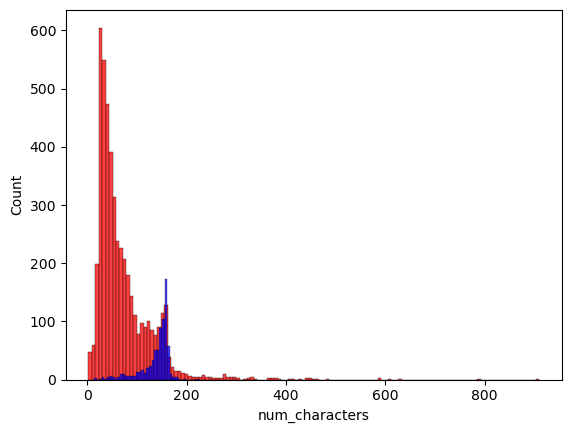

In [20]:
sns.histplot(df[df['Category'] == 1]['num_characters'], color = 'red')
sns.histplot(df[df['Category'] == 0]['num_characters'], color = 'blue')


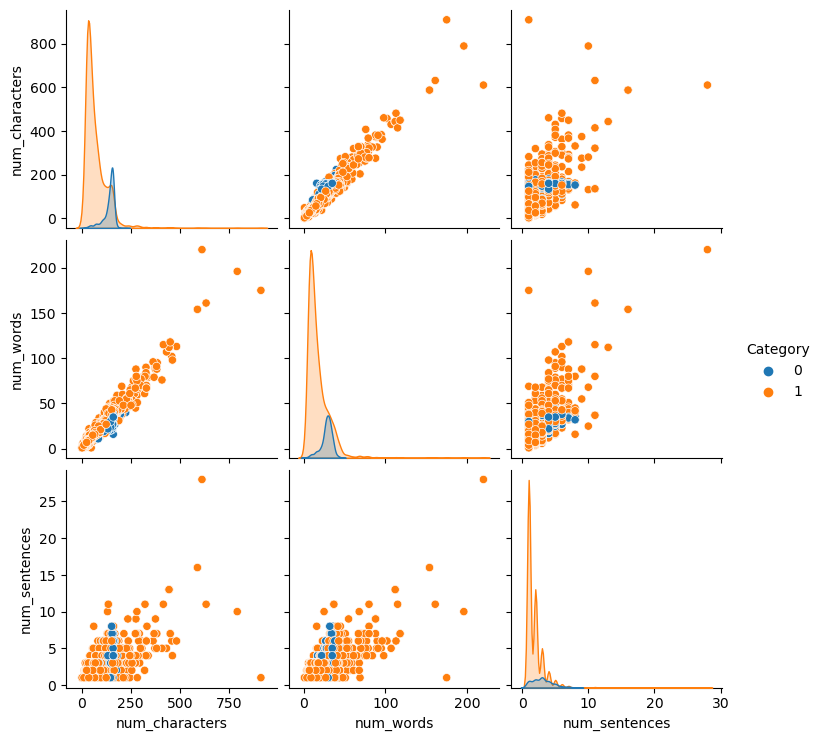

In [21]:
sns.pairplot(df, hue = 'Category')

<Axes: >

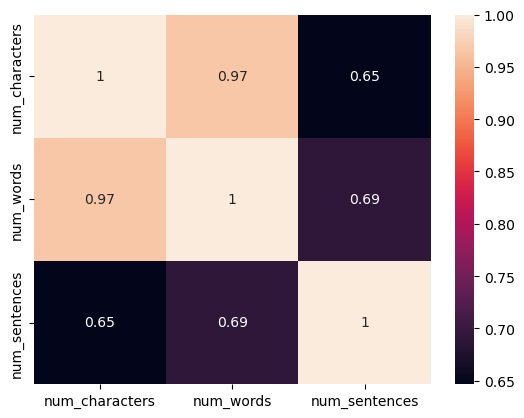

In [157]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [158]:
#Data Preprocessing
# * lower case
# * Tokenizaion
# * Removing special characters
# * Removing stop words and punctuatuions
# * stemming

In [159]:
# def transform_text(text):
#     text  = text.lower() # lower case
#     text = nltk.word_tokenize(text)  # Tokenizaion
    
#     y = [] #Removing special characters
#     for i in text:
#         if i.isalnum():
#             y.append(i)
    
#     text = y[:]  # coping a list , list not coped directly 
#     y.clear()
    
#     for i in text:
#         if i not in stopwords.words('english') and i not in string.punctuation:
#             y.append(i)
                  
#     return y

# transform_text("Hii HOW ARE YOU , I am 20%  ok , &&, Did you like my presentation on ML ??")

In [25]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Now you can use the stop_words list
print(stop_words) # Print the first 10 stopwords in English
print(len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# ps.stem('dancing')
# ps.stem('happening')
# ps.stem('doing')
ps.stem('talking')

'talk'

In [30]:
def transform_text(text):
    text  = text.lower() # lower case
    text = nltk.word_tokenize(text)  # Tokenizaion
    
    y = [] #Removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
   
    #removing  stopping words and punctuation
    text = y[:]  # coping a list , list is not coped directly 
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
   

    #stemming        
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
                  
    return " ".join(y)

transform_text("Hii HOW ARE YOU , I am 20%  ok , &&, Did you like my presentation on ML ?? , stemming words - carring, dancing, happening")

'hii 20 ok like present ml stem word car danc happen'

In [31]:
df['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [32]:
def transform_text(text):
    text  = text.lower() # lower case
    text = nltk.word_tokenize(text)  # Tokenizaion
    
    y = [] #Removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
   
    #removing  stopping words and punctuation
    text = y[:]  # coping a list , list is not coped directly 
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
   

    #stemming        
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
                  
    return " ".join(y)

transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [33]:
df['Message'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [34]:
df['transform_text'] = df['Message'].apply(transform_text)
print(df)

     Category                                            Message  \
0           1  Go until jurong point, crazy.. Available only ...   
1           1                      Ok lar... Joking wif u oni...   
2           0  Free entry in 2 a wkly comp to win FA Cup fina...   
3           1  U dun say so early hor... U c already then say...   
4           1  Nah I don't think he goes to usf, he lives aro...   
...       ...                                                ...   
5567        0  This is the 2nd time we have tried 2 contact u...   
5568        1              Will Ì_ b going to esplanade fr home?   
5569        1  Pity, * was in mood for that. So...any other s...   
5570        1  The guy did some bitching but I acted like i'd...   
5571        1                         Rofl. Its true to its name   

      num_characters  num_words  num_sentences  \
0                111         24              2   
1                 29          8              2   
2                155         37  

In [35]:
#jo sabse imp words hai usko bda kerke dekhaega
from wordcloud import WordCloud
wc = WordCloud(width=500, height = 500 , min_font_size = 10, background_color = 'white')

In [36]:
#spam
#Through this command we will get word cloud object
wc.generate(df[df['Category'] == 0]['transform_text'].str.cat(sep=" "))

In [37]:
spam_wc = wc.generate(df[df['Category'] == 0]['transform_text'].str.cat(sep=" "))

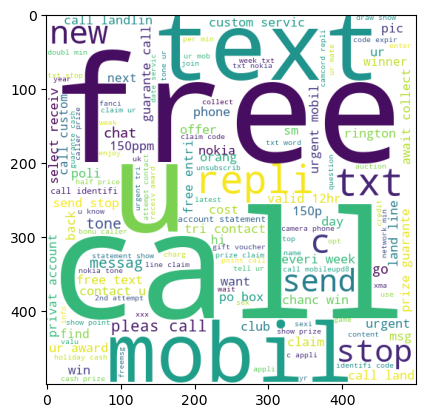

In [38]:
import matplotlib.pyplot as plt
plt.imshow(spam_wc)

In [39]:
ham_wc = wc.generate(df[df['Category'] == 1]['transform_text'].str.cat(sep=" "))

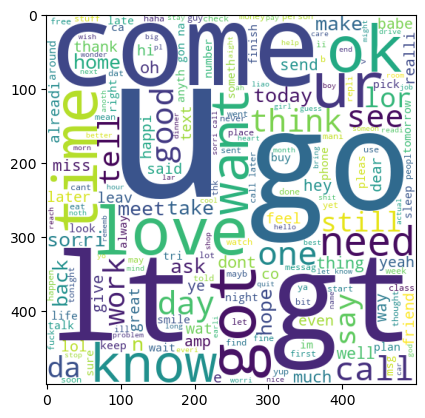

In [40]:
import matplotlib.pyplot as plt
plt.imshow(spam_wc)

In [41]:
# Finding top 30 words in Spam and Ham 

df.head()

,Category,Message,num_characters,num_words,num_sentences,transform_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
df[df['Category'] == 0]['transform_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transform_text, Length: 747, dtype: object

In [43]:
for i in df[df['Category'] == 0]['transform_text']:
    print(i)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [44]:
spam_corpus = []
for i in df[df['Category'] == 0]['transform_text'].tolist():
    for word in i.split():
        spam_corpus.append(word)

In [45]:
len(spam_corpus)

11490

In [46]:
from collections import Counter 
Counter(spam_corpus).most_common(30) # this will give most common 30 words occuring in spam messsages

[('call', 365),
 ('free', 219),
 ('2', 174),
 ('txt', 169),
 ('ur', 144),
 ('u', 141),
 ('text', 139),
 ('mobil', 135),
 ('4', 120),
 ('claim', 115),
 ('stop', 114),
 ('repli', 112),
 ('prize', 94),
 ('get', 88),
 ('tone', 74),
 ('servic', 72),
 ('send', 70),
 ('new', 69),
 ('nokia', 68),
 ('award', 66),
 ('week', 62),
 ('cash', 62),
 ('urgent', 62),
 ('win', 61),
 ('contact', 61),
 ('pleas', 57),
 ('phone', 57),
 ('c', 51),
 ('custom', 51),
 ('collect', 51)]

In [47]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,365
1,free,219
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,4,120
9,claim,115


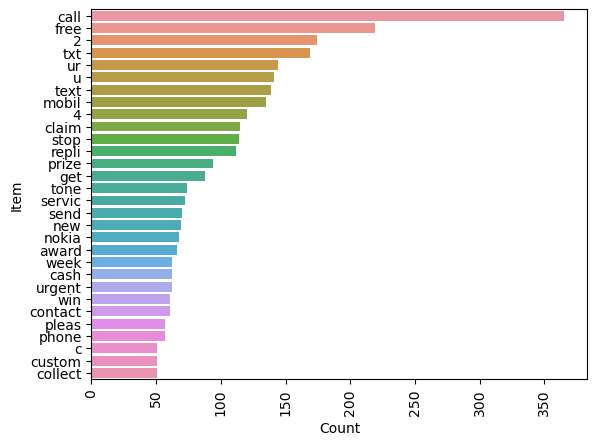

In [48]:
from collections import Counter

data = Counter(spam_corpus).most_common(30)
df1 = pd.DataFrame(data, columns=['Item', 'Count'])
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
sns.barplot(x='Count', y='Item', data=df1)
plt.show()

In [ ]:
# Top 30 words for Ham messages

In [49]:
ham_corpus = []
for i in df[df['Category'] == 1]['transform_text'].tolist():
    for word in i.split():
        ham_corpus.append(word)

In [50]:
len(ham_corpus)

38205

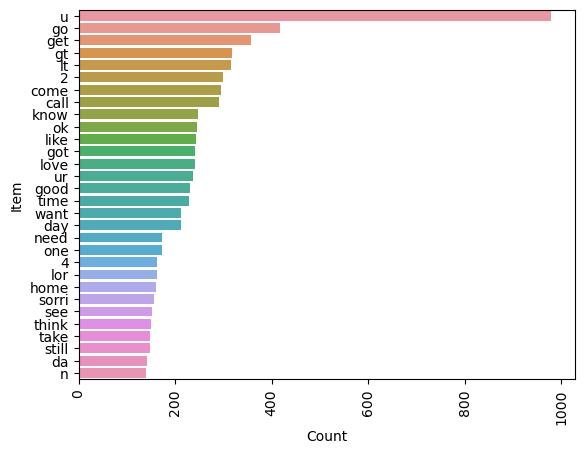

In [51]:
from collections import Counter

data = Counter(ham_corpus).most_common(30)
df2 = pd.DataFrame(data, columns=['Item', 'Count'])
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
sns.barplot(x='Count', y='Item', data=df2)

plt.show()

In [52]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transform_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Model Building 

In [ ]:
# We will first use naive baise algorithm because naive baise algorithm works best on textual data

In [ ]:
# To convert textual data to vectors -
# 1 -> Bag of words
# 2 -> Tf-idf
# 3 - > Word2Vec

In [ ]:
# 1 -> Bag of words

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [128]:
x = cv.fit_transform(df['transform_text']).toarray()
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [129]:
x.shape

(5572, 6708)

In [130]:
y = df['Category'].values

In [131]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=object)

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train , x_test , y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [134]:
# print(type(y_train), type(y_test))
print(y_train.dtype)
print(y_test.dtype)

object
object


In [135]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [136]:
print(y_train.dtype)
print(y_test.dtype)

int32
int32


In [137]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [138]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [139]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(x_test)
print("accuracy_score : ", accuracy_score(y_test, y_pred1))
print("confusion_matrix : ", confusion_matrix(y_test, y_pred1))
print("precision_score : " ,precision_score(y_test, y_pred1))

accuracy_score :  0.873542600896861
confusion_matrix :  [[131  27]
 [114 843]]
precision_score :  0.9689655172413794


In [140]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(x_test)
print("accuracy_score : ", accuracy_score(y_test, y_pred2))
print("confusion_matrix : ", confusion_matrix(y_test, y_pred2))
print("precision_score : " ,precision_score(y_test, y_pred2))

accuracy_score :  0.9713004484304932
confusion_matrix :  [[141  17]
 [ 15 942]]
precision_score :  0.9822732012513035


In [141]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(x_test)
print("accuracy_score : ", accuracy_score(y_test, y_pred3))
print("confusion_matrix : ", confusion_matrix(y_test, y_pred3))
print("precision_score   : " ,precision_score(y_test, y_pred3))

accuracy_score :  0.9695067264573991
confusion_matrix :  [[125  33]
 [  1 956]]
precision_score :  0.9666329625884732


In [142]:
# 2 -> Tf-idf

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [144]:
x = tfidf.fit_transform(df['transform_text']).toarray()

In [145]:
x.shape

(5572, 6708)

In [146]:
y = df['Category'].values

In [147]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=object)

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train , x_test , y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [150]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [151]:
print(y_train.dtype)
print(y_test.dtype)

int32
int32


In [152]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [153]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [154]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(x_test)
print("accuracy_score : ", accuracy_score(y_test, y_pred1))
print("confusion_matrix : ", confusion_matrix(y_test, y_pred1))
print("precision_score : " ,precision_score(y_test, y_pred1))

accuracy_score :  0.8690582959641255
confusion_matrix :  [[125  33]
 [113 844]]
precision_score :  0.9623717217787914


In [155]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(x_test)
print("accuracy_score : ", accuracy_score(y_test, y_pred2))
print("confusion_matrix : ", confusion_matrix(y_test, y_pred2))
print("precision_score : " ,precision_score(y_test, y_pred2))

accuracy_score :  0.957847533632287
confusion_matrix :  [[111  47]
 [  0 957]]
precision_score :  0.953187250996016


In [156]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(x_test)
print("accuracy_score : ", accuracy_score(y_test, y_pred3))
print("confusion_matrix : ", confusion_matrix(y_test, y_pred3))
print("precision_score : " ,precision_score(y_test, y_pred3))

accuracy_score :  0.9695067264573991
confusion_matrix :  [[125  33]
 [  1 956]]
precision_score :  0.9666329625884732
